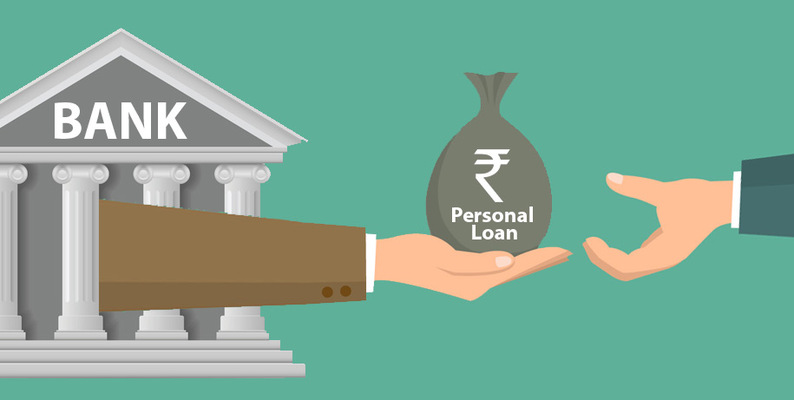

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import timeit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate ,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

over= SMOTE(random_state=27)
under= RandomUnderSampler()


In [2]:
df= pd.read_csv('Loan Data.csv',na_values=['x'])

In [3]:
df.isnull().mean()

Id                   0.000000
Income               0.011518
Age                  0.011518
Experience           0.011518
Married_Single       0.011668
House_Ownership      0.011376
Car_Ownership        0.011376
Profession           0.000000
CITY                 0.011376
STATE                0.011376
CURRENT_JOB_YRS      0.011230
CURRENT_HOUSE_YRS    0.000000
Risk_Flag            0.000000
dtype: float64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().mean()

Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married_Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df.duplicated().sum()

208697

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834.0,23.0,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13,0
1,7574516.0,40.0,10.0,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13,0
2,3991815.0,66.0,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10,0
3,6256451.0,41.0,2.0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12,1
100,4336059.0,54.0,12.0,single,rented,yes,Firefighter,Katihar,Bihar,12.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883.0,43.0,13.0,single,rented,no,Surgeon,Kolkata,West_Bengal,6.0,11,0
251996,2843572.0,26.0,10.0,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6.0,11,0
251997,4522448.0,46.0,7.0,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7.0,12,0
251998,6507128.0,45.0,0.0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0.0,10,0


In [11]:
df.reset_index(inplace=True)

In [12]:
df.drop('index',axis=1,inplace=True)

In [13]:
df

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834.0,23.0,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13,0
1,7574516.0,40.0,10.0,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13,0
2,3991815.0,66.0,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10,0
3,6256451.0,41.0,2.0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12,1
4,4336059.0,54.0,12.0,single,rented,yes,Firefighter,Katihar,Bihar,12.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43182,8154883.0,43.0,13.0,single,rented,no,Surgeon,Kolkata,West_Bengal,6.0,11,0
43183,2843572.0,26.0,10.0,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6.0,11,0
43184,4522448.0,46.0,7.0,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7.0,12,0
43185,6507128.0,45.0,0.0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0.0,10,0


In [14]:
ProfessionList=df['Profession'].unique().tolist()
CITYList=df['CITY'].unique().tolist()
STATElist=df['STATE'].unique().tolist()
joblib.dump(ProfessionList,"ProfessionList.h5")
joblib.dump(CITYList,"CITYList.h5")
joblib.dump(STATElist,"STATElist.h5")
joblib.dump(df.columns,"input.h5")

['input.h5']

In [15]:
x=df.drop('Risk_Flag',axis=1)
y=df['Risk_Flag']

In [16]:
Encoder = ColumnTransformer( 
    transformers=[('Encoder_oh',OneHotEncoder(sparse=False,drop='first'),['Married_Single','House_Ownership','Car_Ownership']),
                                           ('Encoder_bin',BinaryEncoder(),['Profession','CITY','STATE'])],
                                            remainder= 'passthrough')

In [17]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('MUN',MultinomialNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DECT',DecisionTreeClassifier()))
models.append(('RC',RandomForestClassifier()))
models.append(('Guss',GaussianNB()))
models.append(("XG" , XGBClassifier()))
models.append(('SVM',SVC()))

In [18]:
scalers= list()
scalers.append(("MinMaxScaler",MinMaxScaler()))
scalers.append(("StandardScaler",StandardScaler()))
scalers.append(("RobustScaler",RobustScaler()))

In [19]:
for scaler in scalers:
    print(scaler[0])
    for model in models:   
        start= timeit.default_timer()
        steps= list()
        steps.append(("encoder",Encoder))
        steps.append(scaler)
        steps.append(("over",over))
        steps.append(model)
        pipeline= Pipeline(steps=steps)
        try:  # used to avoied MN negative values errors
            scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
        except:
            continue
        print(model[0])
        print("-"*25)
        print("Train Accuracy is " , scores["train_accuracy"].mean())
        print("Test Accuracy is " , scores["test_accuracy"].mean())
        print("-"*25)
        print("Train recall_scores is " , scores["train_recall"].mean())
        print("Test recall_scores is " , scores["test_recall"].mean())
        print("-"*25)
        print("Train precision_scores is " , scores["train_precision"].mean())
        print("Test precision_scores is " , scores["test_precision"].mean())
        print("="*50)
        print("Train f1_scores is " , scores["train_f1"].mean())
        print("Test f1_scores is " , scores["test_f1"].mean())
        print("="*50)
        stop= timeit.default_timer()
        print("Run Time", stop - start)

MinMaxScaler
LR
-------------------------
Train Accuracy is  0.4716929080654298
Test Accuracy is  0.4686593936719053
-------------------------
Train recall_scores is  0.5654690731286907
Test recall_scores is  0.5496839740837703
-------------------------
Train precision_scores is  0.1995933686573907
Test precision_scores is  0.19512857467948938
Train f1_scores is  0.2949952934606426
Test f1_scores is  0.28795632596305143
Run Time 5.795758399995975
MUN
-------------------------
Train Accuracy is  0.4623092971542044
Test Accuracy is  0.45840180801632496
-------------------------
Train recall_scores is  0.589067789310148
Test recall_scores is  0.5783505762124032
-------------------------
Train precision_scores is  0.20116846299256985
Test precision_scores is  0.19757340603626775
Train f1_scores is  0.29989820878940554
Test f1_scores is  0.2945081636873533
Run Time 3.4295354000059888
KNN
-------------------------
Train Accuracy is  0.7147232365583746
Test Accuracy is  0.5268715986667418
---

KNN
-------------------------
Train Accuracy is  0.7071920578918116
Test Accuracy is  0.5178180061374353
-------------------------
Train recall_scores is  0.9664220341943924
Test recall_scores is  0.4690271452582784
-------------------------
Train precision_scores is  0.3977449057584752
Test precision_scores is  0.19507506776832087
Train f1_scores is  0.5635143575530722
Test f1_scores is  0.27554087298465213
Run Time 39.20786940003745
DECT
-------------------------
Train Accuracy is  0.972607616548639
Test Accuracy is  0.6741150217047045
-------------------------
Train recall_scores is  0.8598860011568658
Test recall_scores is  0.2026494265935984
-------------------------
Train precision_scores is  1.0
Test precision_scores is  0.18869632623479277
Train f1_scores is  0.9232192109176397
Test f1_scores is  0.195234148342008
Run Time 6.174787700059824
RC
-------------------------
Train Accuracy is  0.972607616548639
Test Accuracy is  0.803366743064932
-------------------------
Train recal

### let's make some experiments starting with RandomFofrestClassifier

In [20]:
start= timeit.default_timer()
steps= list()
steps.append(("encoder",Encoder))
steps.append(("StanderScaler",RobustScaler()))
steps.append(("over",over))
steps.append(('Model',RandomForestClassifier()))
pipeline= Pipeline(steps=steps)
scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
print(model[0])
print("-"*25)
print("Train Accuracy is " , scores["train_accuracy"].mean())
print("Test Accuracy is " , scores["test_accuracy"].mean())
print("-"*25)
print("Train recall_scores is " , scores["train_recall"].mean())
print("Test recall_scores is " , scores["test_recall"].mean())
print("-"*25)
print("Train precision_scores is " , scores["train_precision"].mean())
print("Test precision_scores is " , scores["test_precision"].mean())
print("="*50)
print("Train f1_scores is " , scores["train_f1"].mean())
print("Test f1_scores is " , scores["test_f1"].mean())
print("="*50)
stop= timeit.default_timer()
print("Run Time", stop - start)

SVM
-------------------------
Train Accuracy is  0.972607616548639
Test Accuracy is  0.8029962815793594
-------------------------
Train recall_scores is  0.9005699284597529
Test recall_scores is  0.0015395127097836852
-------------------------
Train precision_scores is  0.9560939640273597
Test precision_scores is  0.1297056277056277
Train f1_scores is  0.927272611259504
Test f1_scores is  0.0030394616992875456
Run Time 56.094595100032166


In [21]:
steps= list()
steps.append(("encoder",Encoder))
steps.append(("Scaler",RobustScaler()))
steps.append(("imputer" , SimpleImputer(strategy="median")))
pipeline_Pre= Pipeline(steps=steps)
pipeline_Pre.fit(x) 
joblib.dump(pipeline_Pre , "pipeline_Pre.h5")

['pipeline_Pre.h5']

 ###  try another way in preprocsssing data

In [22]:
OH_encoded_col= x[['Married_Single','House_Ownership','Car_Ownership']]
encoder=OneHotEncoder(sparse=False,drop='first')
OH_encoded_df= pd.DataFrame(encoder.fit_transform(OH_encoded_col), columns=encoder.get_feature_names_out())
B_encoded_col=x[['Profession','CITY','STATE']]
BEncoder=BinaryEncoder()
B_encoded_df= BEncoder.fit_transform(B_encoded_col)

In [23]:
OH_encoded_df.isnull().mean()

Married_Single_single     0.0
House_Ownership_owned     0.0
House_Ownership_rented    0.0
Car_Ownership_yes         0.0
dtype: float64

In [24]:
B_encoded_df.isnull().mean()

Profession_0    0.0
Profession_1    0.0
Profession_2    0.0
Profession_3    0.0
Profession_4    0.0
Profession_5    0.0
CITY_0          0.0
CITY_1          0.0
CITY_2          0.0
CITY_3          0.0
CITY_4          0.0
CITY_5          0.0
CITY_6          0.0
CITY_7          0.0
CITY_8          0.0
STATE_0         0.0
STATE_1         0.0
STATE_2         0.0
STATE_3         0.0
STATE_4         0.0
dtype: float64

In [25]:
x=pd.concat([x,B_encoded_df,OH_encoded_df],axis=1)

In [26]:
x.isnull().mean()

Income                    0.0
Age                       0.0
Experience                0.0
Married_Single            0.0
House_Ownership           0.0
Car_Ownership             0.0
Profession                0.0
CITY                      0.0
STATE                     0.0
CURRENT_JOB_YRS           0.0
CURRENT_HOUSE_YRS         0.0
Profession_0              0.0
Profession_1              0.0
Profession_2              0.0
Profession_3              0.0
Profession_4              0.0
Profession_5              0.0
CITY_0                    0.0
CITY_1                    0.0
CITY_2                    0.0
CITY_3                    0.0
CITY_4                    0.0
CITY_5                    0.0
CITY_6                    0.0
CITY_7                    0.0
CITY_8                    0.0
STATE_0                   0.0
STATE_1                   0.0
STATE_2                   0.0
STATE_3                   0.0
STATE_4                   0.0
Married_Single_single     0.0
House_Ownership_owned     0.0
House_Owne

In [27]:
x.drop(['Profession','CITY','STATE','Married_Single','House_Ownership','Car_Ownership'],axis=1,inplace=True)

In [28]:
y.isnull().sum()

0

In [29]:
scaler= RobustScaler()

In [30]:
x

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_0,Profession_1,Profession_2,Profession_3,Profession_4,...,CITY_8,STATE_0,STATE_1,STATE_2,STATE_3,STATE_4,Married_Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1303834.0,23.0,3.0,3.0,13,0,0,0,0,0,...,1,0,0,0,0,1,1.0,0.0,1.0,0.0
1,7574516.0,40.0,10.0,9.0,13,0,0,0,0,1,...,0,0,0,0,1,0,1.0,0.0,1.0,0.0
2,3991815.0,66.0,4.0,4.0,10,0,0,0,0,1,...,1,0,0,0,1,1,0.0,0.0,1.0,0.0
3,6256451.0,41.0,2.0,2.0,12,0,0,0,0,1,...,0,0,0,1,0,0,1.0,0.0,1.0,1.0
4,4336059.0,54.0,12.0,12.0,13,0,0,0,1,0,...,1,0,0,1,0,1,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43182,8154883.0,43.0,13.0,6.0,11,0,1,1,1,0,...,0,0,1,0,0,0,1.0,0.0,1.0,0.0
43183,2843572.0,26.0,10.0,6.0,11,0,1,1,0,0,...,1,0,0,0,0,1,1.0,0.0,1.0,0.0
43184,4522448.0,46.0,7.0,7.0,12,0,1,1,1,1,...,1,0,0,0,1,0,1.0,0.0,1.0,0.0
43185,6507128.0,45.0,0.0,0.0,10,0,1,1,0,0,...,0,1,0,1,0,0,1.0,0.0,1.0,0.0


In [31]:
x= pd.DataFrame( scaler.fit_transform(x), columns=scaler.get_feature_names_out())

In [32]:
x,y= over.fit_resample(x,y)

In [33]:
x

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_0,Profession_1,Profession_2,Profession_3,Profession_4,...,CITY_8,STATE_0,STATE_1,STATE_2,STATE_3,STATE_4,Married_Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,-0.738198,-0.900000,-0.700000,-0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000
1,0.519438,-0.333333,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000
2,-0.199101,0.533333,-0.600000,-0.333333,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.000000,0.000000,0.000000
3,0.255090,-0.300000,-0.800000,-0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
4,-0.130060,0.133333,0.200000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,-1.000000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69483,0.365732,0.011854,0.581210,0.437368,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
69484,-0.208245,0.342740,-0.646889,-0.411481,0.765557,0.000000,1.000000,0.468887,1.000000,-0.531113,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.468887
69485,-0.449294,0.410485,-0.418991,-0.125123,0.531157,0.000000,0.062315,1.000000,0.062315,0.000000,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000
69486,-0.423846,-0.794425,-0.718772,-0.531286,-0.802047,0.604094,1.000000,0.000000,0.000000,-1.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.604094,-0.604094,0.000000


In [34]:
# steps= list()
# steps.append(("encoder",Encoder))
# steps.append(("Scaler",RobustScaler()))
# steps.append(("imputer" , SimpleImputer(strategy="median")))
# steps.append(('over',over))
# pipeline_Pre= Pipeline(steps=steps)

In [35]:
# x,y= pipeline_Pre.fit_resample(x,y)

### let's take another experiment with making deeper preprocessing

In [36]:
models=[]
models.append(('Model',RandomForestClassifier()))
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(model)
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)
    
    
    
#     Model rewsult using pipline pre
# -------------------------
# Train Accuracy is  0.9829755084038359
# Test Accuracy is  0.8806877693486006
# -------------------------
# Train recall_scores is  0.9763916472520956
# Test recall_scores is  0.765750413842509
# -------------------------
# Train precision_scores is  0.9893848732313968
# Test precision_scores is  0.9672956857420723
# ==================================================
# Train f1_scores is  0.9828342346207887
# Test f1_scores is  0.7896488260221315
# ==================================================
# Run Time 106.43609500001185

Model
-------------------------
Train Accuracy is  0.9829755084038359
Test Accuracy is  0.8807741365242151
-------------------------
Train recall_scores is  0.9762837170181715
Test recall_scores is  0.7659231047023826
-------------------------
Train precision_scores is  0.989492628348526
Test precision_scores is  0.9658399963362048
Train f1_scores is  0.9828318894827209
Test f1_scores is  0.7904080805480556
Run Time 59.219243000028655


#### as we can see recall score raised!, so we are going to tune our model parameter

In [37]:
params = [
    
    { "Model__criterion" : ["gini", "entropy"] ,  "Model__max_depth" : range(24, 30),'Model__min_samples_split':range(3,6),
     'Model__min_samples_leaf':range(1,3)}
]

In [38]:
grid = GridSearchCV(pipeline , params , cv = 5 , scoring="accuracy" , return_train_score=True)

In [39]:
start= timeit.default_timer()
grid.fit(x,y)
stop= timeit.default_timer()
print("Run Time", stop - start)

Run Time 4335.44195420004


In [40]:
grid.best_params_

{'Model__criterion': 'gini',
 'Model__max_depth': 29,
 'Model__min_samples_leaf': 1,
 'Model__min_samples_split': 3}

In [41]:
grid.cv_results_["mean_train_score"].max()

0.9829035532103318

In [42]:
grid.cv_results_["mean_test_score"].max()

0.8801553320979701

In [43]:
models=[]
models.append(('Model',RandomForestClassifier(criterion= 'gini',
 max_depth= 28,
 min_samples_leaf= 1,
 min_samples_split= 3)))
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(model)
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)

Model
-------------------------
Train Accuracy is  0.9828783686952139
Test Accuracy is  0.8798819114619075
-------------------------
Train recall_scores is  0.972326200466892
Test recall_scores is  0.7633615809169081
-------------------------
Train precision_scores is  0.9932541566555763
Test precision_scores is  0.9658530860613833
Train f1_scores is  0.9826520051424869
Test f1_scores is  0.7864345679523718
Run Time 55.73495269997511


In [44]:
models=[]
models.append(('RFC',RandomForestClassifier(n_estimators=100,criterion= 'gini',
 max_depth= 30,
 min_samples_leaf= 1,
 min_samples_split= 3)))
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(model)
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)

RFC
-------------------------
Train Accuracy is  0.9829359332642159
Test Accuracy is  0.8804863170442351
-------------------------
Train recall_scores is  0.9732472232160656
Test recall_scores is  0.7644264657721322
-------------------------
Train precision_scores is  0.9924425954929381
Test precision_scores is  0.9708309014304719
Train f1_scores is  0.9827271040290679
Test f1_scores is  0.7880331806779648
Run Time 56.50622270000167


In [45]:
models=[]
models.append(('RFC',RandomForestClassifier(n_estimators=300,criterion= 'gini',
 max_depth= 100,
 min_samples_leaf= 1,
 min_samples_split= 3)))
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(model)
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)

RFC
-------------------------
Train Accuracy is  0.9829755084038359
Test Accuracy is  0.8806158548637125
-------------------------
Train recall_scores is  0.9706496593496403
Test recall_scores is  0.7638796493541687
-------------------------
Train precision_scores is  0.9951528532590548
Test precision_scores is  0.9703212415418984
Train f1_scores is  0.9827090927247539
Test f1_scores is  0.7878136718419925
Run Time 168.57143470004667


### KNN Classifier

<AxesSubplot:>

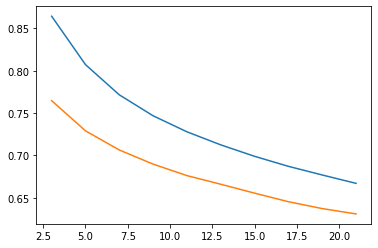

In [46]:
train_accuarcy= []
test_accuarcy= []
for k in range(3,23,2):
    steps= list()
    steps.append(('KNN',KNeighborsClassifier(n_neighbors=k)))
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, scoring='accuracy',cv=5,return_train_score=True)
    train_accuarcy.append(scores['train_score'].mean())
    test_accuarcy.append(scores['test_score'].mean())
sns.lineplot(x= range(3,23,2), y=train_accuarcy)
sns.lineplot(x= range(3,23,2), y=test_accuarcy)

### XGClassifier

In [47]:
import warnings
warnings.filterwarnings('ignore')
for n in range(10,60,20):
    models=[]
    models.append(("XG" , XGBClassifier(n_estimators=n)))
    for model in models:   
        start= timeit.default_timer()
        steps= list()
        steps.append(model)
        pipeline= Pipeline(steps=steps)
        scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
        print(model[0],n)
        print("-"*25)
        print("Train Accuracy is " , scores["train_accuracy"].mean())
        print("Test Accuracy is " , scores["test_accuracy"].mean())
        print("-"*25)
        print("Train recall_scores is " , scores["train_recall"].mean())
        print("Test recall_scores is " , scores["test_recall"].mean())
        print("-"*25)
        print("Train precision_scores is " , scores["train_precision"].mean())
        print("Test precision_scores is " , scores["test_precision"].mean())
        print("="*50)
        print("Train f1_scores is " , scores["train_f1"].mean())
        print("Test f1_scores is " , scores["test_f1"].mean())
        print("="*50)
        stop= timeit.default_timer()
        print("Run Time", stop - start)

XG 10
-------------------------
Train Accuracy is  0.853276995634044
Test Accuracy is  0.8555611270895189
-------------------------
Train recall_scores is  0.7065539986017418
Test recall_scores is  0.711150832204333
-------------------------
Train precision_scores is  1.0
Test precision_scores is  0.7999692402337742
Train f1_scores is  0.8256820546425045
Test f1_scores is  0.7507854377576793
Run Time 4.618218599935062
XG 30
-------------------------
Train Accuracy is  0.8762774120753161
Test Accuracy is  0.8762410998343352
-------------------------
Train recall_scores is  0.7525620223678329
Test recall_scores is  0.7526836571374981
-------------------------
Train precision_scores is  0.9999896168622158
Test precision_scores is  0.7997894444397764
Train f1_scores is  0.8557378577805306
Test f1_scores is  0.7734982010885849
Run Time 12.13360439997632
XG 50
-------------------------
Train Accuracy is  0.879101642207857
Test Accuracy is  0.8775938663016654
-------------------------
Train r

### Voting

In [48]:
from sklearn.ensemble import VotingClassifier

models=[]
models.append(("Voting" , VotingClassifier(estimators=[('Model',RandomForestClassifier(n_estimators=100,criterion= 'gini',
 max_depth= 30,
 min_samples_leaf= 1,
 min_samples_split= 3)),('LR',LogisticRegression()),("XG" , XGBClassifier(n_estimators=50)),("KNN" ,KNeighborsClassifier(n_neighbors= 3))]))  )
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(model)
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)
    

Voting
-------------------------
Train Accuracy is  0.9353342790721
Test Accuracy is  0.8781693934259446
-------------------------
Train recall_scores is  0.874892305984565
Test recall_scores is  0.7591882108756345
-------------------------
Train precision_scores is  0.9950629540683602
Test precision_scores is  0.9694883475680017
Train f1_scores is  0.9304184745556514
Test f1_scores is  0.7835577300078381
Run Time 130.06970039999578


In [49]:
models=[]
models.append(("Voting" , VotingClassifier(estimators=[('Model',RandomForestClassifier()),('LR',LogisticRegression()),("XG" , XGBClassifier()),("KNN" ,KNeighborsClassifier(n_neighbors= 3))]))  )
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(model)
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)

Voting
-------------------------
Train Accuracy is  0.9378059236631205
Test Accuracy is  0.8781693696090865
-------------------------
Train recall_scores is  0.8817064151841919
Test recall_scores is  0.760569717042822
-------------------------
Train precision_scores is  0.9929595346161685
Test precision_scores is  0.9652042845356723
Train f1_scores is  0.933436948373993
Test f1_scores is  0.7846102493747382
Run Time 144.88053810002748


### Voting with parameters

In [50]:
pipeline.fit(x,y)
joblib.dump(pipeline,'Loan Prediction ML model.h5')

['Loan Prediction ML model.h5']